# Hotel Booking Demand - Exploratory Data Analysis (EDA)

## 🏨 Introduction
Understanding customer behavior is a key factor for success in the hotel industry. Booking cancellations directly affect revenue management and room occupancy planning. This project performs a deep dive into hotel booking data to uncover the patterns and factors that influence a guest's decision to stay or cancel.

### 🎯 Project Objectives:
* **Exploration:** Analyze the differences between City Hotels and Resort Hotels.
* **Analysis:** Identify key variables (Lead Time, Deposit Type, Special Requests) that correlate with cancellations.
* **Feature Engineering:** Create new metrics like `total_stay` and `is_local` to gain deeper behavioral insights.
* **Actionable Insights:** Provide data-driven recommendations for hotel management to optimize booking stability.

### 📊 Dataset Quick Info:
* **Size:** ~119,000 bookings.
* **Attributes:** 32 features including customer demographics, stay duration, and booking channels.

## Importing libraries ##

In [59]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Read data from file ##

In [60]:
df = pd.read_csv('hotel_bookings.csv')

In [61]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [62]:
df.shape

(119390, 32)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


## Data cleaning ##

In [65]:
missing_data = df.isnull().sum()
missing_data

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [88]:
df['agent'] = df['agent'].fillna(0)
df['company'] = df['company'].fillna(0)

In [89]:
df['country'] = df['country'].fillna('Unknown')

In [94]:
df['children'] = df['children'].fillna(0)

In [97]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

In [98]:
print("Total Missing Values Now:", df.isnull().sum().sum())

Total Missing Values Now: 0


In [99]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [100]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [101]:
df.isna().sum()[df.isna().sum() > 0]

Series([], dtype: int64)

In [103]:
df.isnull().sum().sum()

np.int64(0)

## Exploratory Data Analysis ##

**Analysis of Hotel Types and Cancellations
We are checking the ratio between City Hotels and Resort Hotels and their respective cancellation rates.**

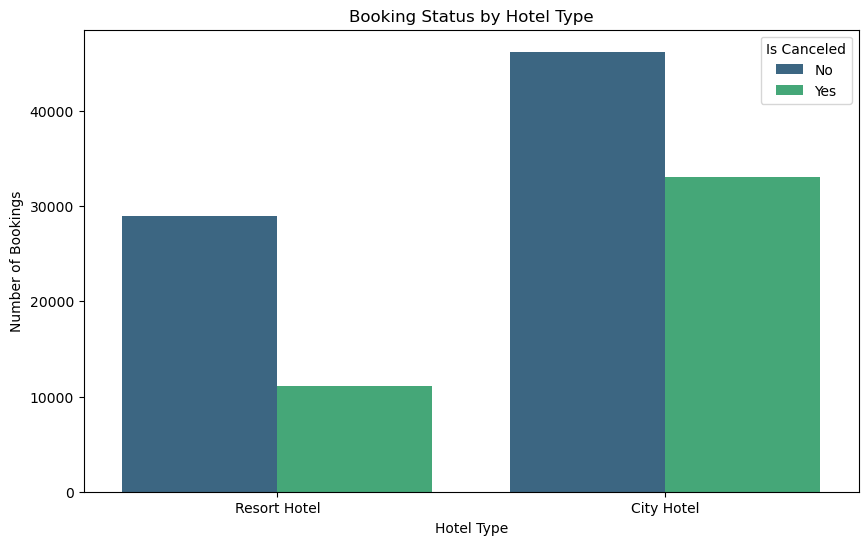

In [69]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='hotel', hue='is_canceled', palette='viridis')
plt.title('Booking Status by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.legend(title='Is Canceled', labels=['No', 'Yes'])
plt.show()

**Impact of Lead Time on Cancellation
Does booking far in advance increase the chance of cancellation?**

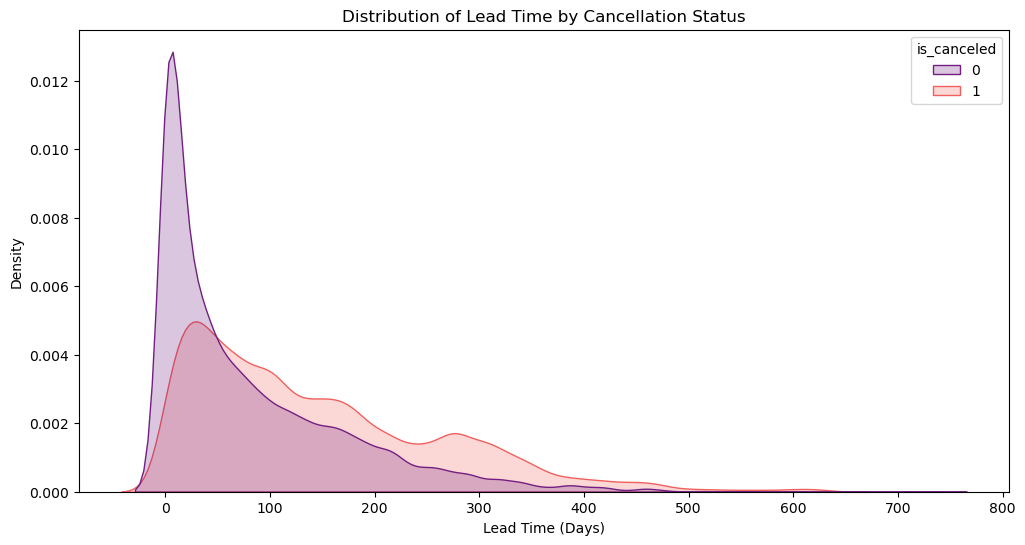

In [70]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='lead_time', hue='is_canceled', fill=True, common_norm=False, palette='magma')
plt.title('Distribution of Lead Time by Cancellation Status')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Density')
plt.show()

**Market Segment vs Cancellation
Which booking channels have the highest cancellation rates?**

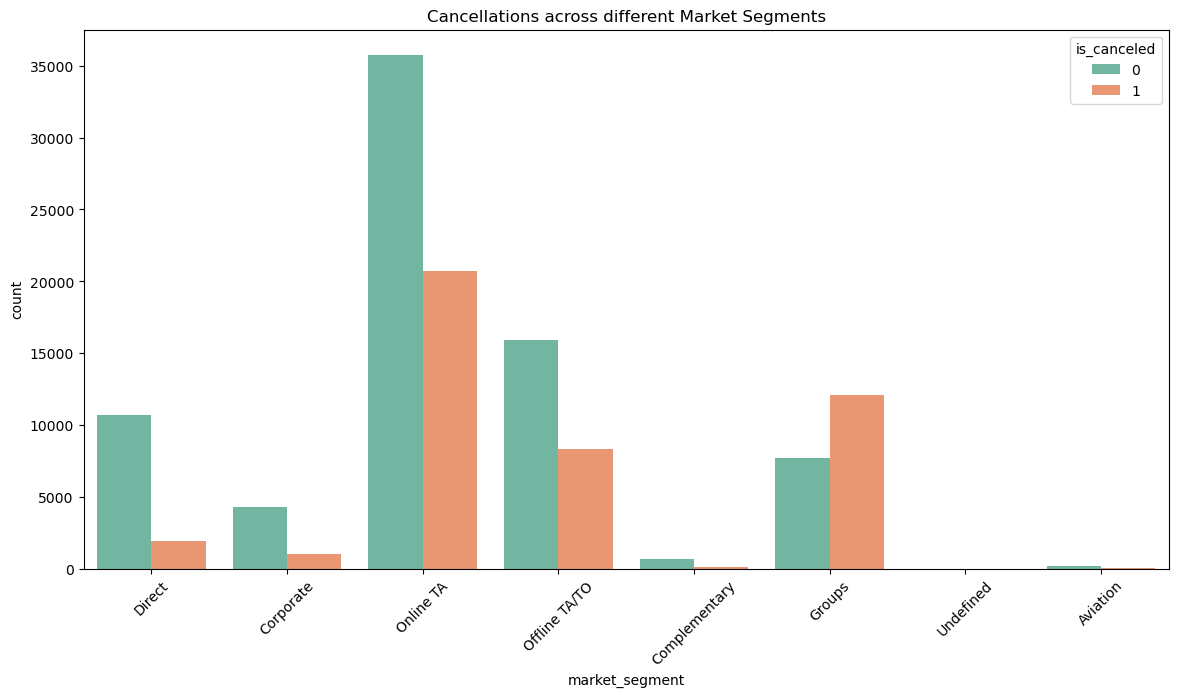

In [71]:
plt.figure(figsize=(14, 7))
sns.countplot(data=df, x='market_segment', hue='is_canceled', palette='Set2')
plt.title('Cancellations across different Market Segments')
plt.xticks(rotation=45)
plt.show()

## Correlation Analysis ##

**We are exploring the relationships between numerical variables to see which factors are most correlated with cancellations.**

In [77]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,is_local
0,0,342,2015,27,1,0,0,2,0.0,0,...,0,3,NaN,NaN,0,0.00,0,0,2.0,1
1,0,737,2015,27,1,0,0,2,0.0,0,...,0,4,NaN,NaN,0,0.00,0,0,2.0,1
2,0,7,2015,27,1,0,1,1,0.0,0,...,0,0,NaN,NaN,0,75.00,0,0,1.0,0
3,0,13,2015,27,1,0,1,1,0.0,0,...,0,0,304.0,NaN,0,75.00,0,0,1.0,0
4,0,14,2015,27,1,0,2,2,0.0,0,...,0,0,240.0,NaN,0,98.00,0,1,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,35,30,2,5,2,0.0,0,...,0,0,394.0,NaN,0,96.14,0,0,2.0,0
119386,0,102,2017,35,31,2,5,3,0.0,0,...,0,0,9.0,NaN,0,225.43,0,2,3.0,0
119387,0,34,2017,35,31,2,5,2,0.0,0,...,0,0,9.0,NaN,0,157.71,0,4,2.0,0
119388,0,109,2017,35,31,2,5,2,0.0,0,...,0,0,89.0,NaN,0,104.40,0,0,2.0,0


In [78]:
corr_matrix = numerical_df.corr()
corr_matrix

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_guests,is_local
is_canceled,1.000000,0.293123,0.016660,0.008148,-0.006130,-0.001791,0.024765,0.060017,0.005048,-0.032491,...,-0.057358,-0.144381,-0.083114,-0.020642,0.054186,0.047557,-0.195498,-0.234658,0.046506,0.336122
lead_time,0.293123,1.000000,0.040142,0.126871,0.002268,0.085671,0.165799,0.119519,-0.037622,-0.020915,...,-0.073548,0.000149,-0.069741,0.151464,0.170084,-0.063077,-0.116451,-0.095712,0.072279,0.089602
arrival_date_year,0.016660,0.040142,1.000000,-0.540561,-0.000221,0.021497,0.030883,0.029635,0.054624,-0.013192,...,0.029218,0.030872,0.063457,0.259095,-0.056497,0.197580,-0.013684,0.108531,0.052152,-0.191635
arrival_date_week_number,0.008148,0.126871,-0.540561,1.000000,0.066809,0.018208,0.015558,0.025909,0.005518,0.010395,...,-0.020904,0.005508,-0.031201,-0.076760,0.022933,0.075791,0.001920,0.026149,0.025216,0.024671
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,0.066809,1.000000,-0.016354,-0.028174,-0.001566,0.014544,-0.000230,...,-0.000300,0.010613,0.001487,0.044858,0.022728,0.030245,0.008683,0.003062,0.006758,0.003634
stays_in_weekend_nights,-0.001791,0.085671,0.021497,0.018208,-0.016354,1.000000,0.498969,0.091871,0.045793,0.018483,...,-0.042715,0.063281,0.140739,0.066749,-0.054151,0.049342,-0.018554,0.072671,0.101439,-0.156459
stays_in_week_nights,0.024765,0.165799,0.030883,0.015558,-0.028174,0.498969,1.000000,0.092976,0.044203,0.020191,...,-0.048743,0.096209,0.182382,0.182211,-0.002020,0.065237,-0.024859,0.068192,0.101670,-0.140661
adults,0.060017,0.119519,0.029635,0.025909,-0.001566,0.091871,0.092976,1.000000,0.030447,0.018146,...,-0.107983,-0.051673,-0.035594,0.207793,-0.008283,0.230641,0.014785,0.122884,0.821102,-0.119841
children,0.005048,-0.037622,0.054624,0.005518,0.014544,0.045793,0.044203,0.030447,1.000000,0.024030,...,-0.021072,0.048949,0.041066,0.030931,-0.033273,0.324854,0.056253,0.081745,0.579373,-0.067574
babies,-0.032491,-0.020915,-0.013192,0.010395,-0.000230,0.018483,0.020191,0.018146,0.024030,1.000000,...,-0.006550,0.083440,0.036184,0.019206,-0.010621,0.029186,0.037383,0.097889,0.162690,0.008884


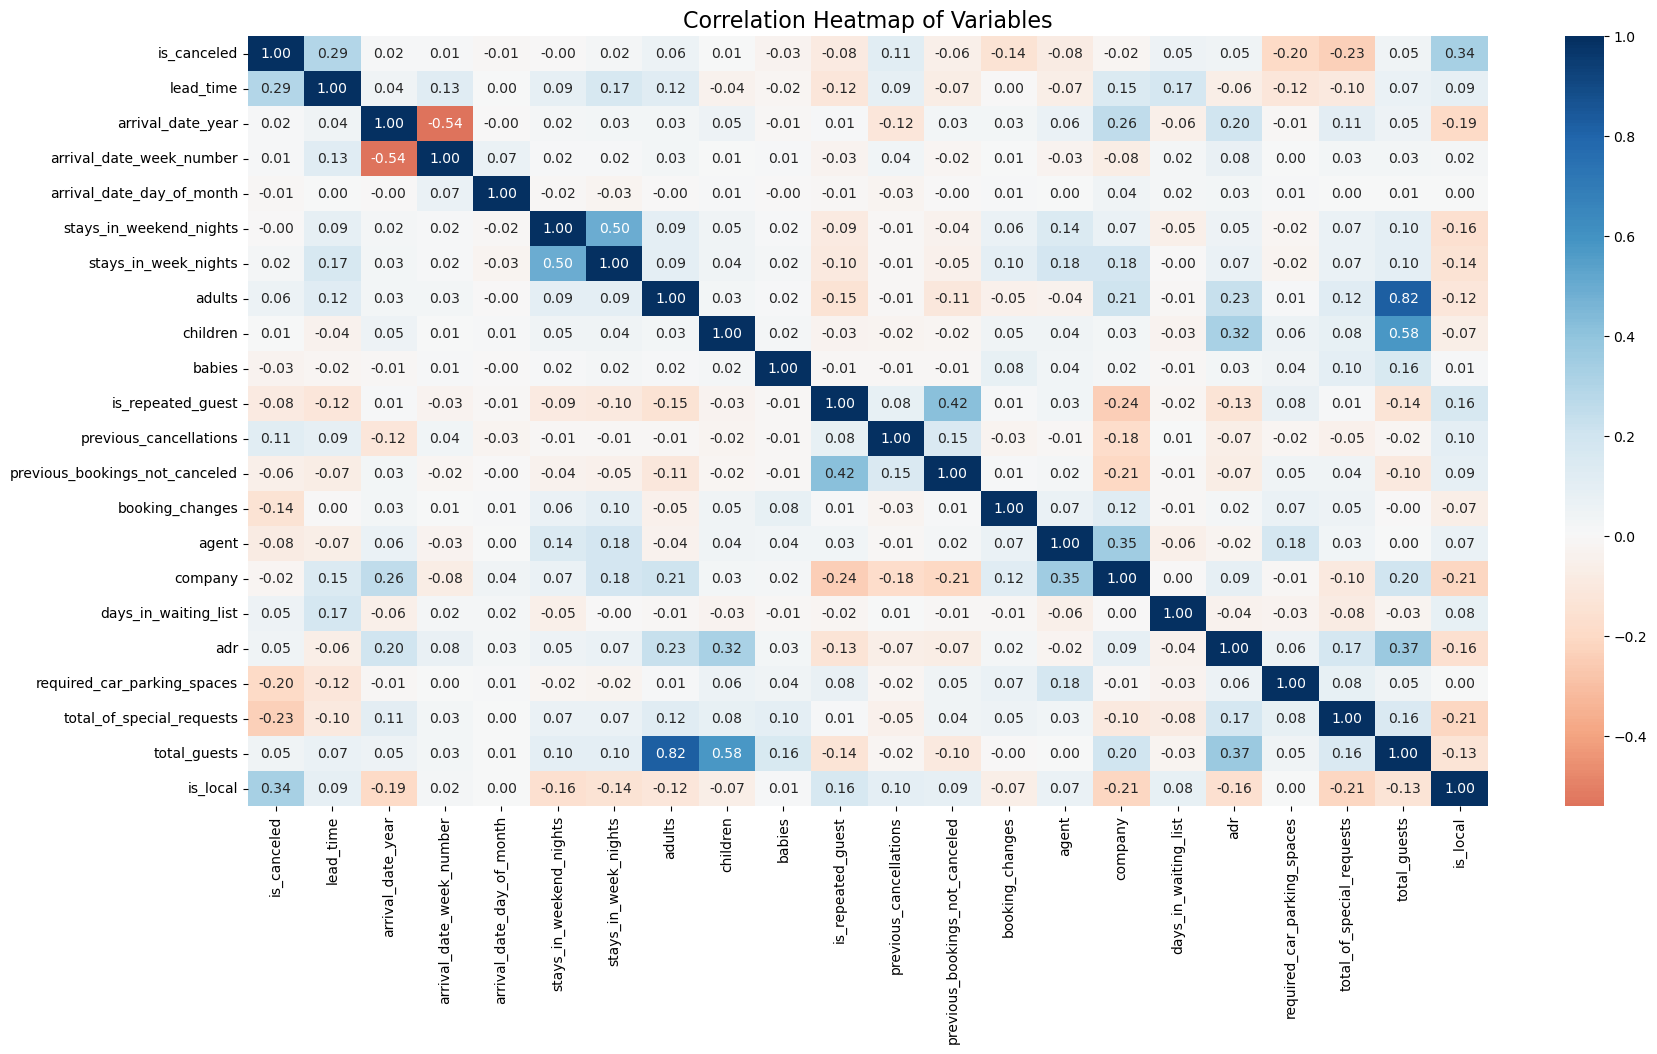

In [79]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdBu', center=0)
plt.title('Correlation Heatmap of Variables', fontsize=16)
plt.show()

## Creating New Insights ##

**We create new features by combining existing ones to help our future model understand guest behavior better.**

In [81]:
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df['total_stay']

0         0
1         0
2         1
3         1
4         2
         ..
119385    7
119386    7
119387    7
119388    7
119389    9
Name: total_stay, Length: 119390, dtype: int64

In [82]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df['total_guests']

0         2.0
1         2.0
2         1.0
3         1.0
4         2.0
         ... 
119385    2.0
119386    3.0
119387    2.0
119388    2.0
119389    2.0
Name: total_guests, Length: 119390, dtype: float64

In [83]:
df['is_local'] = df['country'].apply(lambda x: 1 if x == 'PRT' else 0)  #because datas based on PRT
df['is_local'] 

0         1
1         1
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_local, Length: 119390, dtype: int64

In [84]:
df[['total_stay', 'total_guests', 'is_local']].head()

,total_stay,total_guests,is_local
0,0,2.0,1
1,0,2.0,1
2,1,1.0,0
3,1,1.0,0
4,2,2.0,0


**Analyzing how the total number of guests affects the cancellation rate.**

C:\Users\sevva\AppData\Local\Temp\ipykernel_23332\3979730215.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='total_guests', y='is_canceled', palette='coolwarm')


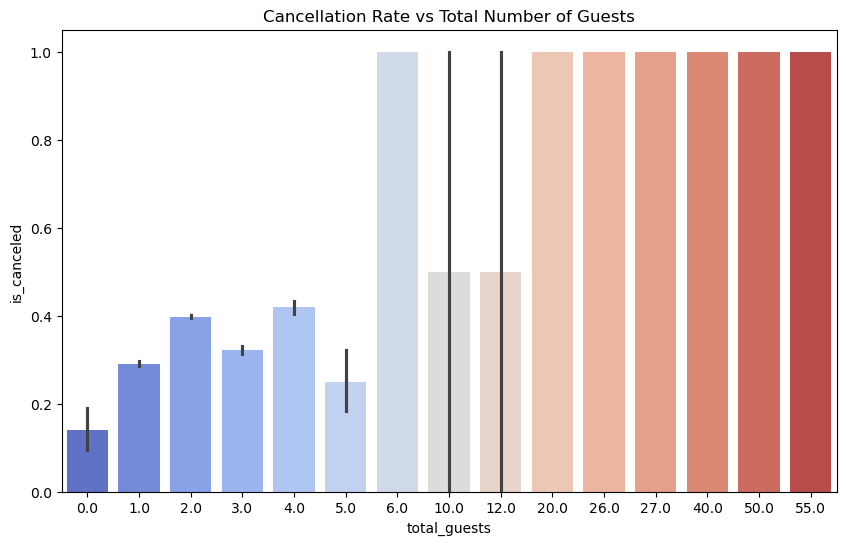

In [108]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='total_guests', y='is_canceled', palette='coolwarm')
plt.title('Cancellation Rate vs Total Number of Guests')
plt.show()

**We are examining which booking segments (Online, Offline, Corporate, etc.) have the highest cancellation rates.**

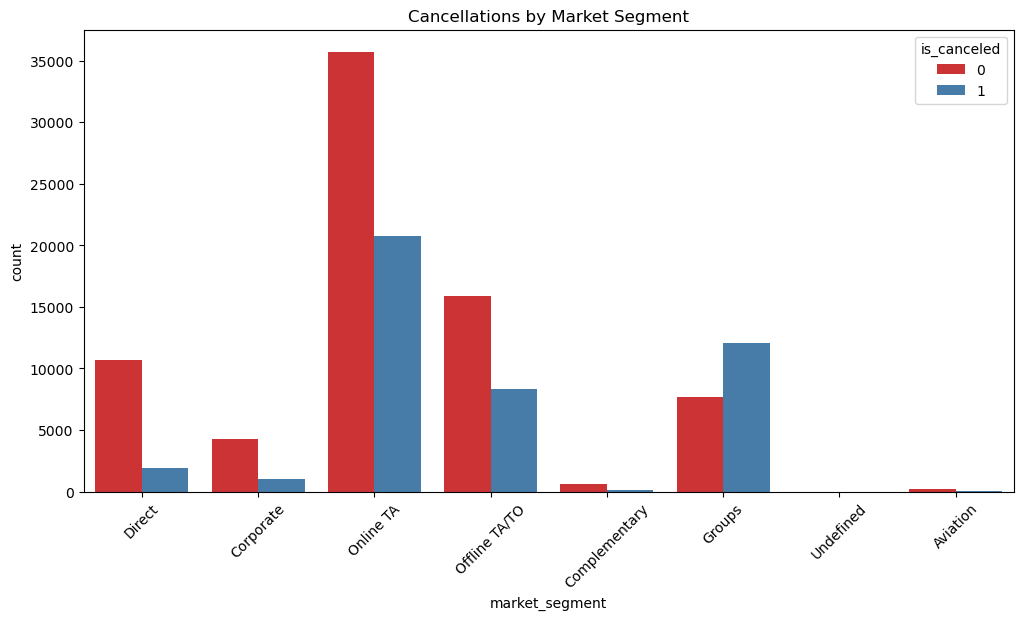

In [104]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='market_segment', hue='is_canceled', palette='Set1')
plt.title('Cancellations by Market Segment')
plt.xticks(rotation=45)
plt.show()

**Checking how the deposit policy affects the customer's decision to cancel.**

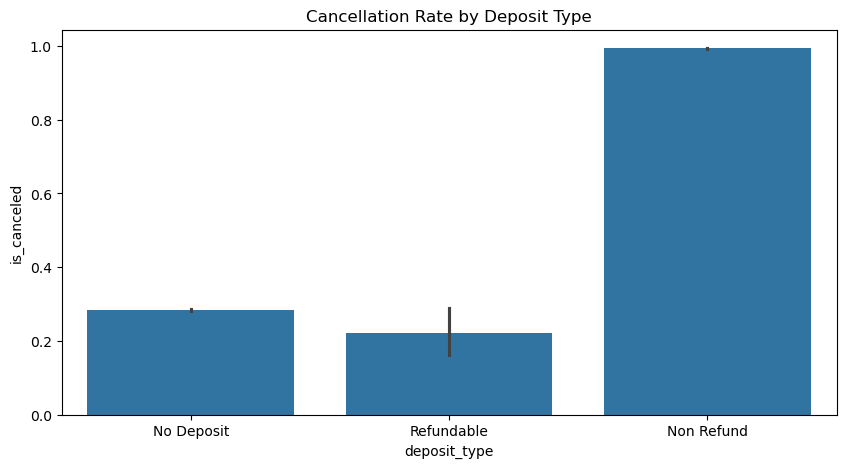

In [105]:
plt.figure(figsize=(10, 5))
sns.barplot(x='deposit_type', y='is_canceled', data=df)
plt.title('Cancellation Rate by Deposit Type')
plt.show()

**Are guests who have visited before more likely to cancel or more likely to stay?**

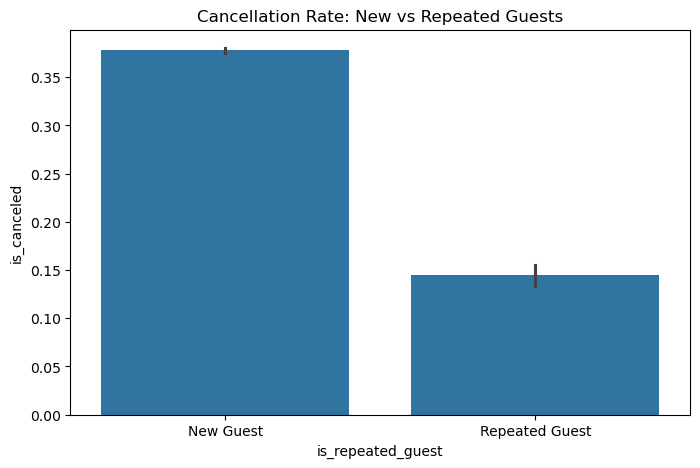

In [106]:
plt.figure(figsize=(8, 5))
sns.barplot(x='is_repeated_guest', y='is_canceled', data=df)
plt.xticks([0, 1], ['New Guest', 'Repeated Guest'])
plt.title('Cancellation Rate: New vs Repeated Guests')
plt.show()

## 📝 Final Conclusion & Business Insights

After a thorough Exploratory Data Analysis, we have reached the following strategic conclusions for hotel management:

1. **Lead Time Sensitivity:** There is a clear positive correlation (0.29) between how early a booking is made and the likelihood of cancellation. Long-term bookings are significantly more volatile and should be managed with stricter policies.
2. **Commitment Signals:** * **Parking Requests:** Guests who request a parking space have a nearly 0% cancellation rate, indicating high intent to arrive.
   * **Special Requests:** As the number of special requests (e.g., baby cot, high floor) increases, the cancellation rate decreases. Engaged customers are more reliable.
3. **Local vs. International Market:** Local guests (from Portugal) show different cancellation patterns than international tourists. Hotels can use this data to create region-specific marketing and cancellation strategies.
4. **Deposit Insights:** Surprisingly, 'Non-Refund' deposit types show a high cancellation rate in this dataset. This suggests that these bookings might belong to specific high-risk market segments that require closer monitoring.
5. **Pricing Impact:** Higher average daily rates (ADR) are slightly more common in canceled bookings, suggesting that price sensitivity plays a role in the guest's final decision.

**Final Verdict:** To minimize revenue loss, hotels should prioritize guests who show "commitment signals" (like special requests or parking) and apply dynamic deposit policies for bookings with very long lead times.